# Classifieur de félin

### Import

In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import NASNetMobile
from keras.utils import to_categorical


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
path_numpy = '/content/drive/MyDrive/felin/np_felin'

X = np.load(path_numpy + "/images.npy")
y = np.load(path_numpy + "/labels.npy")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def displayGraph(pathLog,pathSaveGraph):
    """
    # Fonction permettant de creer nos graph de suivi de metriques
    :param pathLog: chemin du CSV contenant nos metrics
    :param pathSaveGraph: chemin de destination pour sauvegarder nos 4 graphiques en jpg
    """

    data = pd.read_csv(pathLog)
    print(data.head(10))
    # split into input (X) and output (Y) variables
    plot(data['epoch'], data['accuracy'], data['val_accuracy'], 'TRAIN_VAL_Accuracy', 'Epoch', 'Accuracy', 'upper left',pathSaveGraph)
    plot(data['epoch'], data['loss'], data['val_loss'], 'TRAIN_VAL_Loss', 'Epoch', 'Loss', 'upper left',pathSaveGraph)

In [ ]:
def plot(X, Y, Y2, title, xLabel, yLabel, legendLoc, pathSaveGraph):
    """
    # Fonction d'affichage de graph
    :param X: correspond au nombre d'époch
    :param Y: correspond a la courbe accuracy
    :param Y2: correspond a la courbe loss
    :param title: titre du graphique
    :param xLabel: label des abcisses
    :param yLabel: label des ordonnees
    :param legendLoc: legende
    :param pathSaveGraph: chemin de sauvegarde pour les graphiques
    """

   #On trace nos differentes courbes
    plt.plot(Y)
    plt.plot(Y2)
   #titre du graph, legende...
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.legend(['train', 'val'], loc=legendLoc)
   #Pour avoir un courbe propre qui demarre à 0
    plt.xlim(xmin=0.0, xmax=max(X))
    plt.savefig(pathSaveGraph +'/' + title)
    plt.figure()
    #plt.show()

In [19]:
print(X_train.shape)
print(X_test.shape)

print(X_train[0].shape)
print(X_test[0].shape)

(12208, 224, 224, 3)
(3052, 224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [20]:
dimension = X[0].shape

In [ ]:
model = keras.Sequential([ 
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', 
        input_shape=(dimension[0], dimension[1], dimension[2])), 
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(7, activation='Softmax') 
    ])
model.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics=['accuracy'])

NameError: ignored

In [ ]:
early = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

csv_logger = keras.callbacks.CSVLogger('./log_moModel.csv', append=True, separator=',')

In [ ]:
model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test,y_test), callbacks=[early, csv_logger])

Epoch 1/100
763/763 [==============================] - 33s 32ms/step - loss: 5.5780 - accuracy: 0.2208 - val_loss: 1.8015 - val_accuracy: 0.2923
Epoch 2/100
763/763 [==============================] - 25s 33ms/step - loss: 1.8214 - accuracy: 0.2575 - val_loss: 1.7202 - val_accuracy: 0.3545
Epoch 3/100
763/763 [==============================] - 24s 31ms/step - loss: 1.7415 - accuracy: 0.2891 - val_loss: 1.8092 - val_accuracy: 0.3522
Epoch 4/100
763/763 [==============================] - 25s 32ms/step - loss: 1.6593 - accuracy: 0.3112 - val_loss: 1.5671 - val_accuracy: 0.4037
Epoch 5/100
763/763 [==============================] - 25s 32ms/step - loss: 1.6169 - accuracy: 0.3368 - val_loss: 1.4567 - val_accuracy: 0.4371
Epoch 6/100
763/763 [==============================] - 24s 31ms/step - loss: 1.5724 - accuracy: 0.3624 - val_loss: 1.4531 - val_accuracy: 0.4404
Epoch 7/100
763/763 [==============================] - 24s 31ms/step - loss: 1.5214 - accuracy: 0.3899 - val_loss: 1.5587 - val_ac

   epoch  accuracy      loss  val_accuracy  val_loss
0      0  0.204210  5.706079      0.198231  1.998181
1      1  0.184142  1.944530      0.214286  1.910743
2      2  0.198313  1.901627      0.210354  1.996956
3      3  0.193234  1.870250      0.195282  1.967657
4      4  0.192824  1.851290      0.204456  1.860765
5      5  0.201098  1.862384      0.244758  1.784047
6      6  0.202163  1.842656      0.202490  1.882264
7      7  0.211173  1.817503      0.230341  1.784783
8      8  0.204456  1.850559      0.193971  1.936730
9      9  0.205357  1.835344      0.207405  1.940315


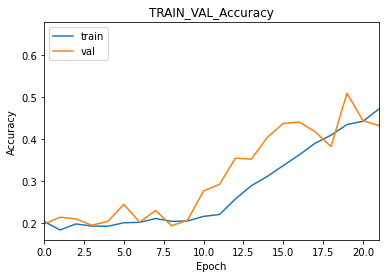

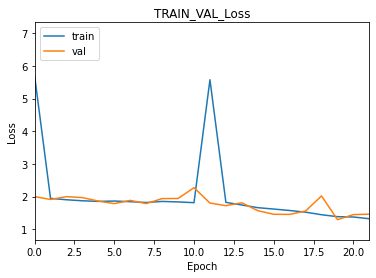

<Figure size 432x288 with 0 Axes>

In [ ]:
#Definition des chemins d'acces a notre fichier log
pathLogs = '/content/log_moModel.csv' 
pathSaveGraph = '/content'
displayGraph(pathLogs, pathSaveGraph)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 109, 109, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                        

In [ ]:
augm = ImageDataGenerator(
        rotation_range = 35,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest')
augm.fit(X_train)

In [ ]:
model.fit_generator(augm.flow(X_train, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[early, csv_logger])

In [21]:
pretrained_model = NASNetMobile(weights='imagenet', include_top=False, input_shape=(dimension[0], dimension[1], dimension[2]))

19993432/19993432 [==============================] - 0s 0us/step


In [22]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [23]:
model2 = keras.Sequential([
    pretrained_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])

In [24]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [27]:
history2 = model2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
382/382 [==============================] - 1342s 3s/step - loss: 1.8983 - accuracy: 0.3147 - val_loss: 1.7341 - val_accuracy: 0.3591
Epoch 2/10
382/382 [==============================] - 1284s 3s/step - loss: 1.6281 - accuracy: 0.3807 - val_loss: 1.5828 - val_accuracy: 0.3994
Epoch 3/10
382/382 [==============================] - 1289s 3s/step - loss: 1.5463 - accuracy: 0.4073 - val_loss: 1.5852 - val_accuracy: 0.3938
Epoch 4/10
382/382 [==============================] - 1286s 3s/step - loss: 1.5045 - accuracy: 0.4264 - val_loss: 1.5953 - val_accuracy: 0.3919
Epoch 5/10
382/382 [==============================] - 1289s 3s/step - loss: 1.4652 - accuracy: 0.4434 - val_loss: 1.5439 - val_accuracy: 0.4273
Epoch 6/10
382/382 [==============================] - 1289s 3s/step - loss: 1.4238 - accuracy: 0.4532 - val_loss: 1.5463 - val_accuracy: 0.4315
Epoch 7/10
382/382 [==============================] - 1293s 3s/step - loss: 1.3978 - accuracy: 0.4667 - val_loss: 1.5512 - val_accuracy:

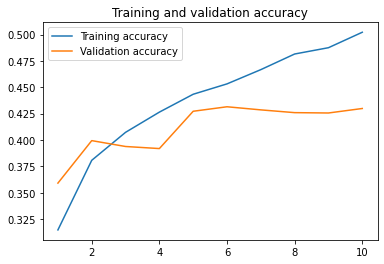

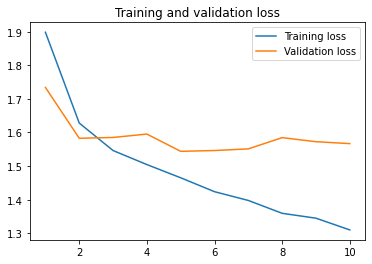

In [28]:
accuracy = history2.history["accuracy"]
val_accuracy = history2.history["val_accuracy"]
loss = history2.history["loss"]
val_loss = history2.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label="Training accuracy")
plt.plot(epochs, val_accuracy, label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()